In [1]:
import utils
from classifier import SingleConvClassifier, MultiConvClassifier
from torch.utils.data import DataLoader, TensorDataset
import classifier_util as util
from classifier_util import BATCH_SIZE, NCLASSES, N_EPOCHS
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
import torch.nn.functional as F
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
def predict_song(path):
    spectogram = utils.load_song(path)
    labels = [0 for i in range(NCLASSES)]
    with open(path[:-4] + ".txt", "r") as f:
        for l in f.readlines():
            labels[utils.INSTRUMENTS[l.strip()]] = 1
    
    
    device = util.get_device()
    x = torch.Tensor(spectogram)
    x = x[:, :, :259]
    y = torch.Tensor(labels)
    x, y = x.to(device), y.to(device)
    y = y.int()
    
    plt.imshow(x.tolist()[0])
    plt.show()

    instruments = list(utils.INSTRUMENTS.keys())
    
    print("True labels:")
    print(list(filter(lambda x: y[utils.INSTRUMENTS[x]], instruments)))
    
    m = MultiConvClassifier(NCLASSES)
    m = util.bind_gpu(m)
    
    pretrained_dict = torch.load('Models/mm8.pth')
    m.load_state_dict(pretrained_dict, strict=False)
    m.eval()
    
    outputs = m(torch.Tensor(np.array([x.tolist()]))).squeeze()
    predicted = (torch.sigmoid(outputs) > 0.5) * 1
    
    print("Predicted:")
    print(list(filter(lambda x: predicted[utils.INSTRUMENTS[x]], instruments)))

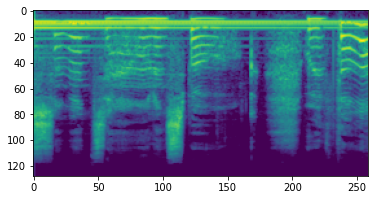

True labels:
['voi']
Predicted:
['voi']


In [36]:
predict_song("Data/IRMAS-TestingData/00 - gold fronts-1.wav")

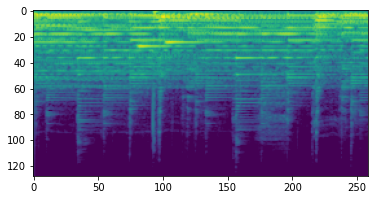

True labels:
['gac', 'voi']
Predicted:
['gac']


In [37]:
predict_song("Data/IRMAS-TestingData/00 - gold fronts-13.wav")

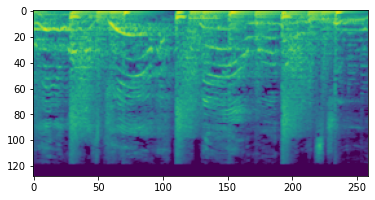

True labels:
['voi']
Predicted:
['voi']


In [38]:
predict_song("Data/IRMAS-TestingData/00 - yazoo - dont go-9.wav")

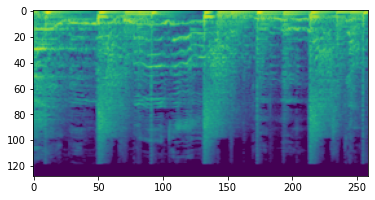

True labels:
['voi']
Predicted:
['voi']


In [39]:
predict_song("Data/IRMAS-TestingData/00 - yazoo - dont go-4.wav")

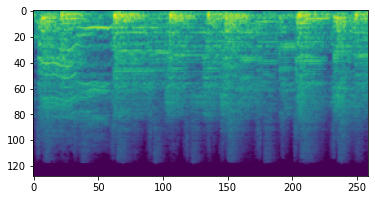

True labels:
['gel', 'voi']
Predicted:
[]


In [40]:
predict_song("Data/IRMAS-TestingData/01 - Led Zeppelin - Custard Pie-13.wav")

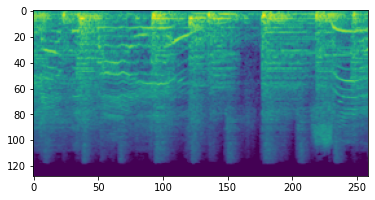

True labels:
['gel', 'voi']
Predicted:
['voi']


In [41]:
predict_song("Data/IRMAS-TestingData/01 - Led Zeppelin - Custard Pie-10.wav")